# Esercizio 11.3: Fit di funzione a più variabili

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
def f(x, y):
    return np.sin(x**2+y**2)

np.random.seed(0)

# PARAMETERS
n_t = 30000 #N_train
n_v = 1000  #N_valid
n_e = 80   #N_epochs
sigma = 0.2

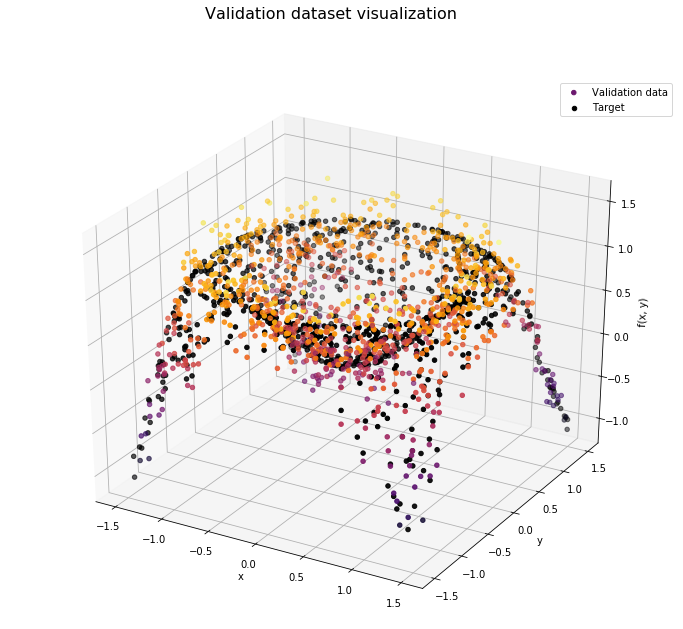

In [6]:
from mpl_toolkits.mplot3d import Axes3D
# generate training inputs
np.random.seed(0)
xy_train = np.random.uniform(low=-1.5, high=1.5, size=(n_t,2))
xy_valid = np.random.uniform(low=-1.5, high=1.5, size=(n_v,2))
z_target = f(xy_valid[:,0], xy_valid[:,1]) # ideal (target) linear function

z_train = np.random.normal(f(xy_train[:,0], xy_train[:,1]), sigma) 
z_valid = np.random.normal(f(xy_valid[:,0], xy_valid[:,1]), sigma)

# plot training and target dataset
x_plot, y_plot = np.meshgrid(xy_valid[:,0], xy_valid[:,1])
z_plot = np.sin(f(x_plot, y_plot))

fig = plt.figure(figsize=(12, 10))
fig.suptitle('Validation dataset visualization', fontsize=16)
ax = fig.gca(projection='3d')
ax.scatter(xy_valid[:,0], xy_valid[:,1], z_valid, c= z_valid, cmap='inferno', marker='o', label='Validation data')
ax.scatter(xy_valid[:,0], xy_valid[:,1], z_target, label='Target', c='black' )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel ("f(x, y)")
ax.legend()
plt.show()

In [7]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(2,), activation='tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation='linear'))

# compile
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

# fit
history = model.fit(x=xy_train, y=z_train, 
batch_size=32, epochs=n_e,
shuffle=True,
validation_data=(xy_valid, z_valid), verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________
Instructions for updatin

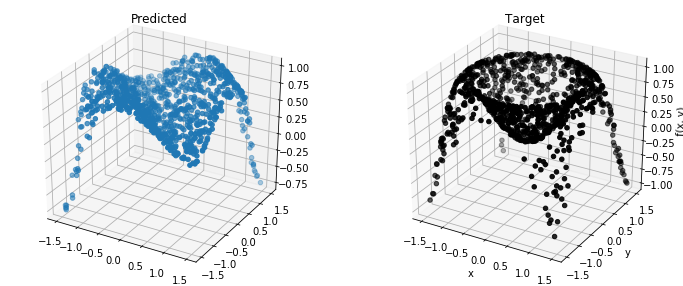

In [8]:
#predicted values
xy_predicted = np.random.uniform(low=-1.5, high=1.5, size=(n_v,2))
z_predicted = model.predict(xy_predicted)

# plot
fig = plt.figure( figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection = "3d")
ax = fig.gca(projection='3d')
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, cmap='inferno', marker='o', label='Validation data')
ax.set_title ("Predicted")

ax2 = fig.add_subplot(1, 2, 2, projection = "3d")
ax2 = fig.gca(projection='3d')
ax2.scatter(xy_valid[:,0], xy_valid[:,1], z_target, label='Target', c='black' )
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel ("f(x, y)")
ax2.set_title ("Target")
plt.show()